# Assignment 2: Data Analysis 

This assignment is an example of the exploratory data analysis stage included in many modern projects undertaken today. I am using a sample dataset found on Kaggle which contains information on over 91,000 individual police stops. Each row represents a stop and columns provide driver demographics and stop details.

In [15]:
# import the appropriate libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [16]:
# import police data
df = pd.read_csv("police.csv")

In [17]:
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Preliminaries: cleaning the data <br>
There are a few changes I would like to make before beginning my analysis:
1. Drop columns that are not useful
2. Convert the time strings to the appropriate datetime format
3. Set the index as the date so that I can select data using this

In [18]:
# drop the columns that I do not need 

df.drop(['county_name','driver_age_raw','violation_raw','is_arrested','drugs_related_stop'], inplace=True, axis=1)

In [19]:
# converting the stop_date strings to datetime objects

df['stop_date'] = pd.to_datetime(df['stop_date'], format="%Y-%m-%d")

In [20]:
# setting the index

df.set_index(['stop_date'], inplace=True)

In [21]:
df

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,stop_duration
stop_date,,,,,,,,,
2005-01-02,01:55,M,20.0,White,Speeding,False,NaN,Citation,0-15 Min
2005-01-18,08:15,M,40.0,White,Speeding,False,NaN,Citation,0-15 Min
2005-01-23,23:15,M,33.0,White,Speeding,False,NaN,Citation,0-15 Min
2005-02-20,17:15,M,19.0,White,Other,False,NaN,Arrest Driver,16-30 Min
2005-03-14,10:00,F,21.0,White,Speeding,False,NaN,Citation,0-15 Min
...,...,...,...,...,...,...,...,...,...
2015-12-31,20:27,M,29.0,White,Speeding,False,NaN,Warning,0-15 Min
2015-12-31,20:35,F,33.0,White,Equipment,False,NaN,Warning,0-15 Min
2015-12-31,20:45,M,23.0,White,Moving violation,False,NaN,Warning,0-15 Min


To focus on a particular timeframe, I will access the data of 2014-2015 only. This narrows the data down to 17,827 rows.

In [22]:
# create new DF for 2014-2015

dataf = df.loc['2014-01-01':'2015-12-31'] 
print(dataf.shape)


(17827, 9)


## Exploration <br>
I can now continue with cleaner and more relevant data. To start, I am interested in the variety of violations recorded, so I will look at the unique values under this column.

In [23]:
df.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

Speeding is a seriously harmful offence and affects many lives each year, so I will focus on this violation for now. 

In [24]:
speeding = (dataf['violation']=='Speeding') 
speed_df = dataf[speeding] # new df created with only speeding offences

In [25]:
speed_df

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,stop_duration
stop_date,,,,,,,,,
2014-01-01,00:39,M,49.0,White,Speeding,False,NaN,Warning,0-15 Min
2014-01-01,00:54,M,21.0,White,Speeding,False,NaN,Citation,0-15 Min
2014-01-01,01:48,M,29.0,Black,Speeding,False,NaN,Warning,0-15 Min
2014-01-01,02:05,M,20.0,Hispanic,Speeding,False,NaN,Citation,16-30 Min
2014-01-01,02:37,F,20.0,White,Speeding,False,NaN,Citation,0-15 Min
...,...,...,...,...,...,...,...,...,...
2015-12-31,20:20,M,22.0,White,Speeding,False,NaN,Citation,0-15 Min
2015-12-31,20:25,M,23.0,Hispanic,Speeding,False,NaN,Citation,0-15 Min
2015-12-31,20:27,M,29.0,White,Speeding,False,NaN,Warning,0-15 Min


### Gendered data <br>
Speeding violations makes up 42% of the total driving violations of 2014 and 2015. <br> 
Splitting this into four periods, I will create dataframes on the first and second halves of each year. <br>
The gender() function is then applied to explore the gender share of speeding violations.

In [26]:
def gender(data):
    '''Returns the value counts of the genders recorded in the given data'''
    return data['driver_gender'].value_counts()

In [27]:
# period 1
p1 = speed_df.loc['2014-01-01':'2014-06-30'] # narrowing the data down to that which falls between these dates
print(p1.shape)

gender(p1) 

(2082, 9)


M    1361
F     721
Name: driver_gender, dtype: int64

In [28]:
# period 2
p2 = speed_df.loc['2014-07-01':'2014-12-31']
print(p2.shape)

gender(p2)

(1921, 9)


M    1296
F     625
Name: driver_gender, dtype: int64

In [29]:
# period 3
p3 = speed_df.loc['2015-01-01':'2015-06-30']
print(p3.shape)

gender(p3)

(1566, 9)


M    1049
F     517
Name: driver_gender, dtype: int64

In [30]:
# period 4 
p4 = speed_df.loc['2015-07-01':'2015-12-31']
print(p4.shape)

gender(p4)

(2003, 9)


M    1336
F     666
Name: driver_gender, dtype: int64

Using the gender data just realised, I will create a dataframe so I can plot it into bar chart form by period.

In [31]:
# create dataframe within dictionary 
genders = {
    'period':['p1','p2','p3','p4'],
    'male':[1361,1296,1049,1336],
    'female':[721,625,517,666]
}

In [32]:
gender_df = pd.DataFrame(genders).set_index('period')
gender_df

,male,female
period,,
p1,1361,721
p2,1296,625
p3,1049,517
p4,1336,666


Text(0, 0.5, 'no. violations')

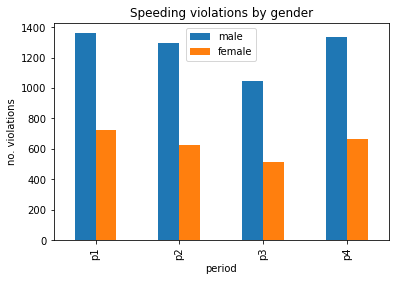

In [33]:
# generate plot and labels
gender_df.plot(kind='bar')
plt.rcParams['figure.figsize'] = [12, 5]
plt.title('Speeding violations by gender')
plt.xlabel('period')
plt.ylabel('no. violations')

**Gender: points to consider** <br>
- Speeding violations across 2014 and 2015 were male-dominated. 
- There was a momentary dip in speeding overall during period 3, although no change in proportion is observed. 
- From this we can conclude that males tend to be more likely to speed than females (**or at least they are more likely to be caught in the act!!**) 


**Live fast, live old?** <br>
I would like to collect some age statistics to further the gender data. <br>
**N.B.** We will no longer consider the period timeframes, going forward the data will cover from beginning of 2014 to the end of 2015

In [34]:
def age_range(data): # function to find information on the age of the drivers
    age_stats = []
    
    min_age = data['driver_age'].min()
    max_age = data['driver_age'].max()
    age_range = max_age - min_age
    mean_age = data['driver_age'].mean()
    return f'min age: {min_age}, max age: {max_age}, mean: {mean_age}, range: {age_range}'

age_range(speed_df)

'min age: 16.0, max age: 90.0, mean: 34.27815270610031, range: 74.0'

The output shows that: <br>
- Min age = 16
- Max age = 90
- Mean age = 34
- Age range = 74

I created the following function to allow me to instantly form a new dataframe for unique values of driver gender from a pre-existing dataset of choice:

In [35]:
def get_gender(data, gender):
    '''Create a dataframe for the data of just one gender group'''
    
    group_gender = data.groupby(['driver_gender']) # split data into gender groups
    filt_gender = group_gender.get_group(gender) # filter the groups by the value passed when calling the function
    return pd.DataFrame(filt_gender) # returns a new dataframe

In [36]:
speed_male_df = get_gender(speed_df, 'M') # dataframe containing only male speeders 
speed_male_df

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,stop_duration
stop_date,,,,,,,,,
2014-01-01,00:39,M,49.0,White,Speeding,False,NaN,Warning,0-15 Min
2014-01-01,00:54,M,21.0,White,Speeding,False,NaN,Citation,0-15 Min
2014-01-01,01:48,M,29.0,Black,Speeding,False,NaN,Warning,0-15 Min
2014-01-01,02:05,M,20.0,Hispanic,Speeding,False,NaN,Citation,16-30 Min
2014-01-01,10:30,M,21.0,White,Speeding,False,NaN,Citation,16-30 Min
...,...,...,...,...,...,...,...,...,...
2015-12-31,20:20,M,22.0,White,Speeding,False,NaN,Citation,0-15 Min
2015-12-31,20:25,M,23.0,Hispanic,Speeding,False,NaN,Citation,0-15 Min
2015-12-31,20:27,M,29.0,White,Speeding,False,NaN,Warning,0-15 Min


In [37]:
speed_female_df = get_gender(speed_df, 'F') # dataframe containing only male speeders
speed_female_df

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,stop_duration
stop_date,,,,,,,,,
2014-01-01,02:37,F,20.0,White,Speeding,False,NaN,Citation,0-15 Min
2014-01-01,10:19,F,22.0,Hispanic,Speeding,False,NaN,Citation,0-15 Min
2014-01-01,10:31,F,49.0,Black,Speeding,False,NaN,Citation,0-15 Min
2014-01-01,11:44,F,24.0,White,Speeding,False,NaN,Citation,0-15 Min
2014-01-01,20:18,F,32.0,White,Speeding,False,NaN,Citation,0-15 Min
...,...,...,...,...,...,...,...,...,...
2015-12-31,08:14,F,55.0,White,Speeding,False,NaN,Citation,0-15 Min
2015-12-31,09:17,F,20.0,White,Speeding,False,NaN,Warning,16-30 Min
2015-12-31,13:50,F,33.0,Hispanic,Speeding,False,NaN,Citation,0-15 Min


**ECDF plot** (Empirical cumulative distribution function)<br>
The ECDF is a useful way of measuring the proportion of the data that holds a particular value. The x-axis is our chosen criteria (or column in a DF), and the y-axis represents the share of the data held by the values of this column. I start by creating a function that passes chosen data, and returns two unpacked values x and y. <br>
The example below will explore the proportion of age values across the distribution.

In [38]:
def ecdf(data):
    """Compute ECDF for an array of measurements"""
    
    n = len(data) # number of data points
    x = np.sort(data) # x-data for the ECDF 
    y = np.arange(1, n+1) / n  # y-data for the ECDF
    return x, y


**N.B.** The numPy arange() function is not inclusive of the second parameter (similarly to the range() function), so we must use n+1 to include our last data point.

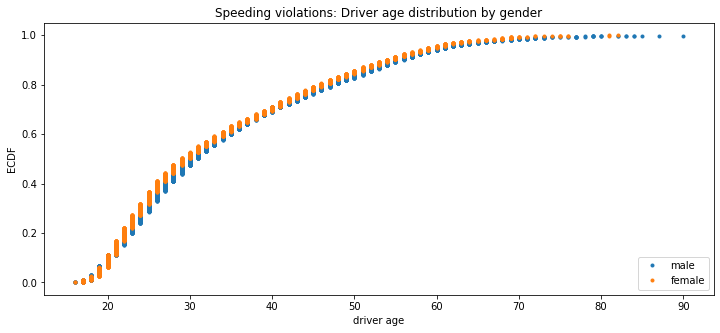

In [39]:
# compute ECDF 
x_age, y_age = ecdf(speed_male_df['driver_age'])
x_age_f, y_age_f = ecdf(speed_female_df['driver_age'])

# generate plot
_= plt.plot(x_age, y_age, marker='.', linestyle='none')
_= plt.plot(x_age_f, y_age_f, marker='.', linestyle='none') 

# label [plot ]
_= plt.xlabel('driver age')
_= plt.ylabel('ECDF')
_= plt.title('Speeding violations: Driver age distribution by gender')
plt.legend(('male', 'female'), loc='lower right')
_= plt.show()


**Findings:** <br>
- roughly 50% of all speeding drivers are below the age of 30
- the oldest speeding offenders are male, although both females and males are found at the lowest age recorded

ECDG plots are useful in probability. If we were to randomly select a case from the speeding dataframe, we know that there is an 80% chance that they will be 50 years old or below. <br>
We can imagine the power these graphs may have for insurance companies working with dataframes on the whole population, containing info on previous claims.

# Race data <br>
I created a function similar to get_gender(), in order to group the violation cases by race to explore the demographic data. 

In [40]:
def get_race(data, race):
    '''Create a dataframe for the data of just one race group'''
    
    group_race = data.groupby(['driver_race']) # group by driver race 
    filt_race = group_race.get_group(race)
    return pd.DataFrame(filt_race) # return dataframe containing given race only


Let's take a look at the unique races included in the data:

In [41]:
speed_df.driver_race.unique()

array(['White', 'Black', 'Hispanic', 'Asian', 'Other'], dtype=object)

Applying the function to each prominant race group:

In [42]:
white_speed = get_race(speed_df, 'White')
black_speed = get_race(speed_df, 'Black')
hispanic_speed = get_race(speed_df, 'Hispanic')
asian_speed = get_race(speed_df, 'Asian')

Again I use the handy ECDF function to lay multiple functions onto the same plot

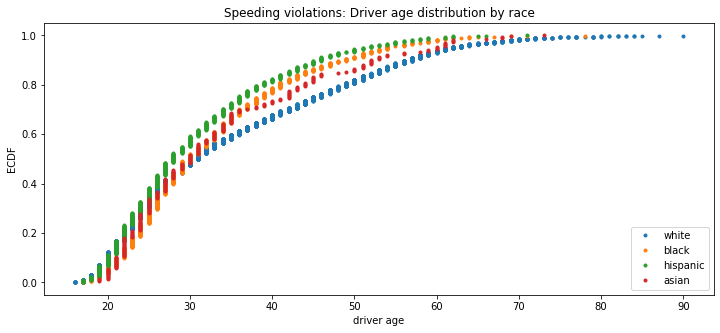

In [43]:
# compute plot for each race
x_white, y_white = ecdf(white_speed['driver_age']) 
x_black, y_black = ecdf(black_speed['driver_age'])
x_hispanic, y_hispanic = ecdf(hispanic_speed['driver_age'])
x_asian, y_asian = ecdf(asian_speed['driver_age'])

# generate plot
_= plt.plot(x_white, y_white, marker='.', linestyle='none') 
_= plt.plot(x_black, y_black, marker='.', linestyle='none')
_= plt.plot(x_hispanic, y_hispanic, marker='.', linestyle='none')
_= plt.plot(x_asian, y_asian, marker='.', linestyle='none')

# label plot
_= plt.xlabel('driver age') 
_= plt.ylabel('ECDF')
_= plt.title('Speeding violations: Driver age distribution by race')
plt.legend(('white', 'black', 'hispanic', 'asian'), loc='lower right')
_= plt.show()

**Findings**: <br>
- Hispanic drivers have the highest proportion of younger speeders, over 90% of these cases are under the age of 50
- The greatest variance is seen in the White race group, which dominates the over 70 year olds 

## Seat belt data <br>
Just for practice, I simulated the seat belt data into ECDF plots

In [44]:
print(df.violation.unique()) 

['Speeding' 'Other' 'Equipment' 'Moving violation' nan
 'Registration/plates' 'Seat belt']


In [45]:
seat_belt = (dataf['violation']=='Seat belt') 
belt_df = dataf[seat_belt] # new df created with only seat belt offences

In [46]:
belt_df

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,stop_duration
stop_date,,,,,,,,,
2014-01-01,09:03,M,31.0,Black,Seat belt,False,NaN,Warning,0-15 Min
2014-01-01,09:17,M,62.0,White,Seat belt,False,NaN,Warning,0-15 Min
2014-01-01,10:07,F,58.0,White,Seat belt,False,NaN,Citation,0-15 Min
2014-01-04,13:55,M,60.0,White,Seat belt,False,NaN,Warning,0-15 Min
2014-01-05,18:31,M,26.0,White,Seat belt,True,Protective Frisk,Citation,0-15 Min
...,...,...,...,...,...,...,...,...,...
2015-12-28,10:25,M,27.0,White,Seat belt,False,NaN,Citation,0-15 Min
2015-12-29,15:16,M,43.0,Hispanic,Seat belt,False,NaN,Warning,0-15 Min
2015-12-29,23:22,M,26.0,White,Seat belt,False,NaN,Warning,0-15 Min


In [47]:
age_range(belt_df)

'min age: 17.0, max age: 77.0, mean: 32.1688829787234, range: 60.0'

In [48]:
belt_male_df = get_gender(belt_df, 'M')

In [49]:
belt_female_df = get_gender(belt_df, 'F')

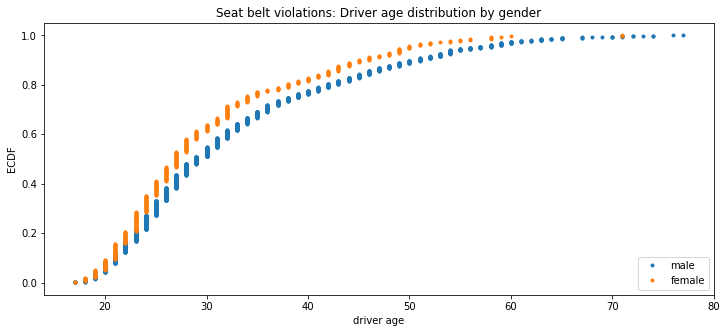

In [50]:
# compute ECDF 
x_belt_m, y_belt_m = ecdf(belt_male_df['driver_age'])
x_belt_f, y_belt_f = ecdf(belt_female_df['driver_age'])

# generate plot
_= plt.plot(x_belt_m, y_belt_m, marker='.', linestyle='none')
_= plt.plot(x_belt_f, y_belt_f, marker='.', linestyle='none') 
plt.rcParams['figure.figsize'] = [12, 6]
# label [plot ]
_= plt.xlabel('driver age')
_= plt.ylabel('ECDF')
_= plt.title('Seat belt violations: Driver age distribution by gender')
plt.legend(('male', 'female'), loc='lower right')
_= plt.show()


In [51]:
white_belt = get_race(belt_df, 'White')
black_belt = get_race(belt_df, 'Black')
hispanic_belt = get_race(belt_df, 'Hispanic')
asian_belt = get_race(belt_df, 'Asian')

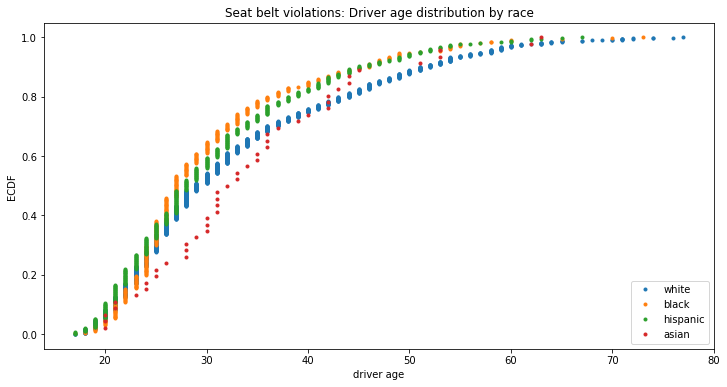

In [52]:
# compute plot for each race
x_whitebelt, y_whitebelt = ecdf(white_belt['driver_age']) 
x_blackbelt, y_blackbelt = ecdf(black_belt['driver_age'])
x_hispanicbelt, y_hispanicbelt = ecdf(hispanic_belt['driver_age'])
x_asianbelt, y_asianbelt = ecdf(asian_belt['driver_age'])

# generate plot
_= plt.plot(x_whitebelt, y_whitebelt, marker='.', linestyle='none') 
_= plt.plot(x_blackbelt, y_blackbelt, marker='.', linestyle='none')
_= plt.plot(x_hispanicbelt, y_hispanicbelt, marker='.', linestyle='none')
_= plt.plot(x_asianbelt, y_asianbelt, marker='.', linestyle='none')

# label plot
_= plt.xlabel('driver age') 
_= plt.ylabel('ECDF')
_= plt.title('Seat belt violations: Driver age distribution by race')
plt.legend(('white', 'black', 'hispanic', 'asian'), loc='lower right')
_= plt.show()